In [1]:
import pandas as pd
import numpy as np
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume(BTC)', 'Volume(Currency)', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-5')[:10]:
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-5/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

changes = np.round(np.array(data['PerChange']), 4)

def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

IN = 15
OUT = 1

X, y = split_sequence(changes, IN, OUT)

2020-06-01.csv
2020-06-02.csv
2020-06-03.csv
2020-06-04.csv
2020-06-05.csv
2020-06-06.csv
2020-06-07.csv
2020-06-08.csv
2020-06-09.csv
2020-06-10.csv


In [2]:
def find_similar(X, y):
    
    sims = {}
    
    for i in range(int(len(X))):
        
        pX = np.delete(X, i, axis=0)
        pY = np.delete(y, i, axis=0)
                   
        new = [X[i] * -1 for x in range(len(pX))]

        summed = np.sum(pX + new, axis=1)
        
        if len(pY[summed == 0]) > 0:
                   
            sims.update({i: ((sum(pY[summed == 0]) + y[i])/len(pY[summed == 0]), len(pY[summed == 0]))}) 
            
            
        if i % 100 is 0:
            print(i)
            
    return sims

In [3]:
s = find_similar(X, y)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


count    2.433000e+03
mean     3.173767e-05
std      1.830839e-03
min     -6.000000e-03
25%     -4.000000e-04
50%     -2.032879e-20
75%      4.000000e-04
max      6.350000e-02
dtype: float64


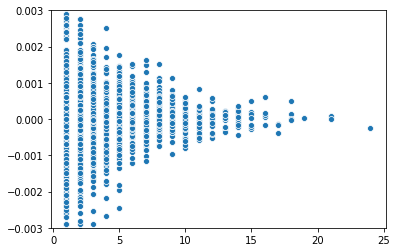

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

vals = [s[0][0] for s in s.values()]
nums = [s[1] for s in s.values()]
print(pd.Series(vals).describe())

plt.ylim(-0.003, 0.003)
sns.scatterplot(x=nums, y=vals)

In [5]:
def predict(X, y, new):
    
    summed = np.sum(X + new, axis=1)
    
    
    return y[np.round(summed, 5) == 0].mean()
    

In [6]:
%%time
predict(X*-1, y, X[10])

Wall time: 1.03 ms


3.5714285714285703e-05

In [7]:
len(y[y < 0])/len(y)

0.44869565217391305

# Fresh Data

In [8]:
new_data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-5')[10:15]:
    new_data = pd.concat([new_data, pd.read_csv(f'../datasets/bitcoin-5/{filename}', index_col=False)])
    print(filename)
    
new_data['PerChange'] = (new_data['Open'] - new_data['Close'])/new_data['WeightedPrice']
new_changes = np.round(np.array(new_data['PerChange']), 4)
new_X, new_y = split_sequence(new_changes, IN, OUT)

2020-06-11.csv
2020-06-12.csv
2020-06-13.csv
2020-06-14.csv
2020-06-15.csv


In [9]:
predict(X*-1, y, new_X[2])

5e-05

In [10]:
new_predictions = [predict(X*-1, y, x) for x in new_X]

Z:\anaconda\envs\btc\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
Z:\anaconda\envs\btc\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
from sklearn.metrics import mean_squared_error

mean_squared_error(new_y.reshape(1, -1)[0], np.nan_to_num(new_predictions))

2.5573843410527533e-06

In [12]:
len(new_predictions)

1430

# Simulation

In [29]:
from btcgame import Game, Predictor

class MyPredictor(Predictor):
    
    def predict_engine(self, pasts, data):
        
        percent = np.nan_to_num(predict(X*-1, y, np.array(pasts)[:, 1]))
        
        sign = 0
        if percent < 0:
            sign = -1
        
        elif percent > 0:
            sign=1
        
        
        return (sign, 0.5)
    

In [35]:
game = Game(pd.concat([pd.DataFrame(new_data['WeightedPrice']), pd.DataFrame(new_data['PerChange'])], axis=1), 
            MyPredictor(preceding=len(new_X[0])), cash=0)

In [36]:
game.play()

Z:\anaconda\envs\btc\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
Z:\anaconda\envs\btc\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Price,Action,Trade,Cash($),Holding(BTC),Capital($),Capped
0,9771.408589,0.0,0.0,0.000000,1.0,9771.408589,0
1,9774.063775,0.0,0.0,0.000000,1.0,9774.063775,0
2,9773.849735,0.0,0.0,0.000000,1.0,9773.849735,0
3,9772.434807,0.0,0.0,0.000000,1.0,9772.434807,0
4,9773.019790,0.0,0.0,0.000000,1.0,9773.019790,0
...,...,...,...,...,...,...,...
1440,9350.585200,0.0,0.5,9685.725507,0.0,9685.725507,0
1441,9346.150634,0.0,0.5,9685.725507,0.0,9685.725507,0
1442,9333.968562,0.0,0.5,9685.725507,0.0,9685.725507,0
1443,9332.153565,0.0,0.5,9685.725507,0.0,9685.725507,0


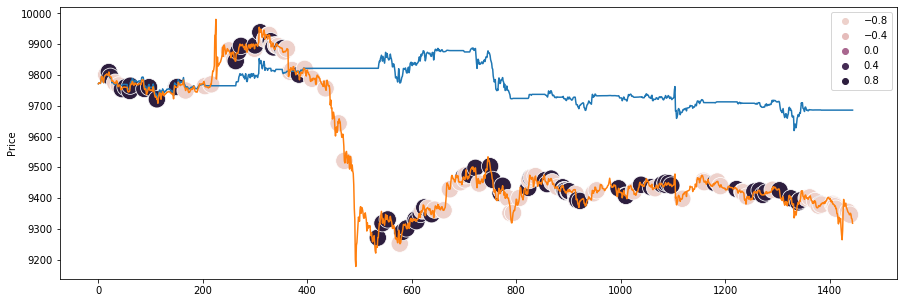

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x=range(len(game.history)), y=game.history['Capital($)'], ax=ax)
sns.lineplot(x=range(len(game.history)), y=game.history['Price'], ax=ax)
sns.scatterplot(x=game.history[game.history['Action'] != 0].index, 
                y=game.history[game.history['Action'] != 0]['Price'], 
                hue=game.history[game.history['Action'] != 0]['Trade'] * game.history[game.history['Action'] != 0]['Action'],
               ax=ax,
               s=300,)

In [38]:
game.history[game.history['Action'] != 0]['Action'].value_counts()

-1.0    74
 1.0    69
Name: Action, dtype: int64

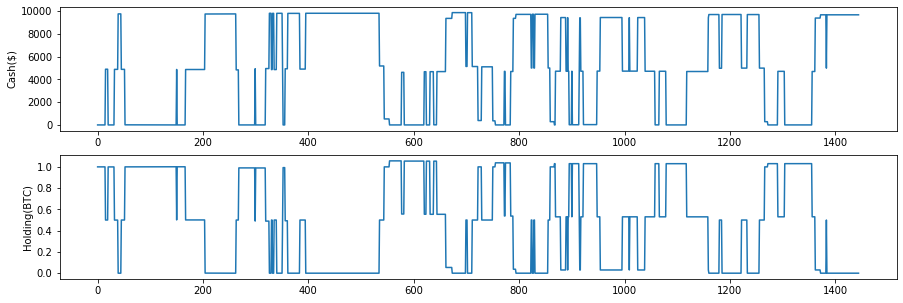

In [39]:
fig, ax = plt.subplots(2, figsize=(15,5))

sns.lineplot(x=range(len(game.history)), y=game.history['Cash($)'], ax=ax[0])
sns.lineplot(x=range(len(game.history)), y=game.history['Holding(BTC)'], ax=ax[1])

# Temp Ex

In [46]:
lX = X.copy()

In [52]:
lX[0]

array([ 0.0025,  0.0007,  0.0011, -0.0017,  0.0005,  0.0004,  0.001 ,
       -0.0014,  0.0026,  0.0008, -0.0009, -0.0007,  0.0001, -0.0008,
        0.0011])